In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import mne
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import ghibtools as gh
import pandas as pd
import seaborn as sns
from params import *
from bibliotheque import get_pos, df_baseline, get_df_mask_chan_signif, keep_clean
from compute_global_dataframes import bandpower_concat_job, oas_concat_job, bmrq_concat_job
from compute_psd import psd_baselined_job
from configuration import base_folder
import os

In [3]:
mask_params = dict(markersize=15, markerfacecolor='y')

In [4]:
pos = get_pos()

In [5]:
metrics = ['power_mean','power_median','power_integral','relative_power']
indexes = ['band','session','chan','participant']

In [6]:
bandpower = bandpower_concat_job.get(global_key).to_dataframe()
bandpower = keep_clean(bandpower, metrics)

In [7]:
bandpower

,dim_0,participant,session,chan,band,power_mean,power_median,power_integral,relative_power,stai_state,stai_trait,keep_session,Gender,Maia_Mean,OAS,BMRQ
0,0,P01,music,Fp1,delta,2.678064,2.724801,8.105543,3.654582,40,61,1,F,1.019643,2.666667,2.727273
1,1,P01,music,Fp1,theta,4.123679,4.115048,16.607378,7.487841,40,61,1,F,1.019643,2.666667,2.727273
2,2,P01,music,Fp1,alpha,5.392905,5.489301,21.597757,9.737875,40,61,1,F,1.019643,2.666667,2.727273
3,3,P01,music,Fp1,beta,2.569195,1.767221,46.065710,20.769848,40,61,1,F,1.019643,2.666667,2.727273
4,4,P01,music,Fp1,low_gamma,1.023265,1.014014,15.342220,6.917414,40,61,1,F,1.019643,2.666667,2.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,13015,P31,odor,Fp2,alpha,1.170172,1.161080,4.675973,3.868772,29,40,1,M,2.790774,2.933333,2.681818
13016,13016,P31,odor,Fp2,beta,1.504186,1.529955,27.108012,22.428428,29,40,1,M,2.790774,2.933333,2.681818
13017,13017,P31,odor,Fp2,low_gamma,1.533565,1.519889,23.024222,19.049612,29,40,1,M,2.790774,2.933333,2.681818
13018,13018,P31,odor,Fp2,high_gamma,1.357157,1.360305,61.030396,50.494881,29,40,1,M,2.790774,2.933333,2.681818


<AxesSubplot: >

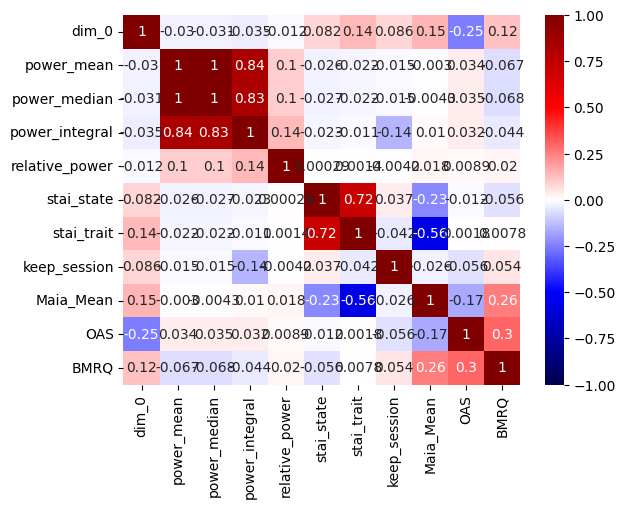

In [8]:
sns.heatmap(bandpower.corr(numeric_only = True), annot =True, vmin = -1, vmax = 1, cmap = 'seismic')

<AxesSubplot: xlabel='band', ylabel='power_integral'>

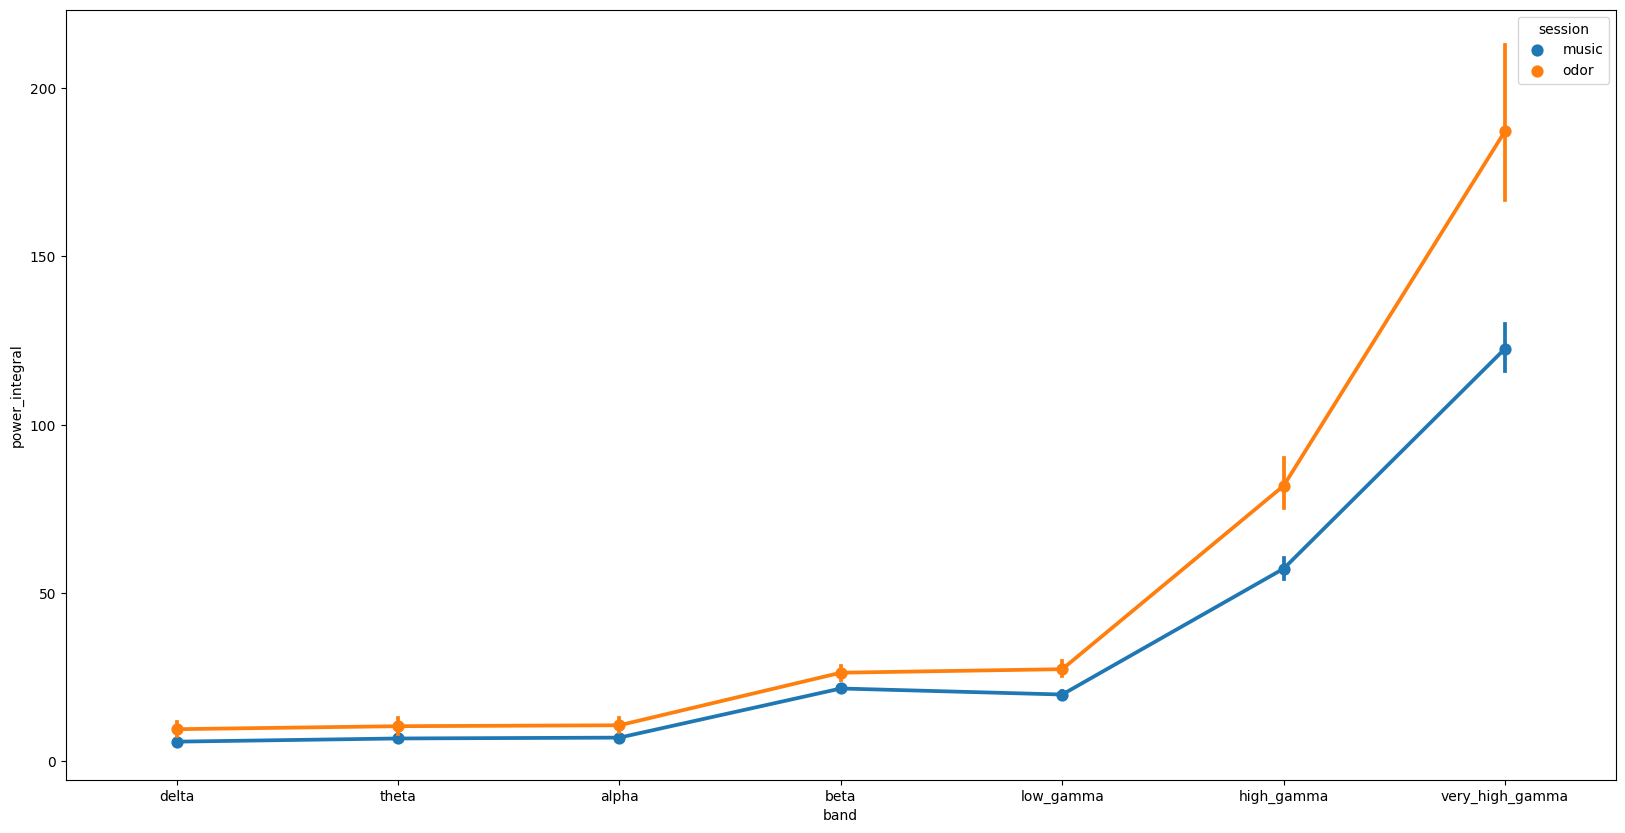

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
sns.pointplot(data=bandpower, x = 'band', y = 'power_integral', hue = 'session',ax=ax)

In [10]:
bandpower

,dim_0,participant,session,chan,band,power_mean,power_median,power_integral,relative_power,stai_state,stai_trait,keep_session,Gender,Maia_Mean,OAS,BMRQ
0,0,P01,music,Fp1,delta,2.678064,2.724801,8.105543,3.654582,40,61,1,F,1.019643,2.666667,2.727273
1,1,P01,music,Fp1,theta,4.123679,4.115048,16.607378,7.487841,40,61,1,F,1.019643,2.666667,2.727273
2,2,P01,music,Fp1,alpha,5.392905,5.489301,21.597757,9.737875,40,61,1,F,1.019643,2.666667,2.727273
3,3,P01,music,Fp1,beta,2.569195,1.767221,46.065710,20.769848,40,61,1,F,1.019643,2.666667,2.727273
4,4,P01,music,Fp1,low_gamma,1.023265,1.014014,15.342220,6.917414,40,61,1,F,1.019643,2.666667,2.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13015,13015,P31,odor,Fp2,alpha,1.170172,1.161080,4.675973,3.868772,29,40,1,M,2.790774,2.933333,2.681818
13016,13016,P31,odor,Fp2,beta,1.504186,1.529955,27.108012,22.428428,29,40,1,M,2.790774,2.933333,2.681818
13017,13017,P31,odor,Fp2,low_gamma,1.533565,1.519889,23.024222,19.049612,29,40,1,M,2.790774,2.933333,2.681818
13018,13018,P31,odor,Fp2,high_gamma,1.357157,1.360305,61.030396,50.494881,29,40,1,M,2.790774,2.933333,2.681818


In [11]:
bandpower_mean = bandpower.groupby(['session','chan','band']).median(True).reset_index()

In [27]:
bandpower_mean.columns

Index(['session', 'chan', 'band', 'dim_0', 'power_mean', 'power_median',
       'power_integral', 'relative_power', 'stai_state', 'stai_trait',
       'keep_session', 'Maia_Mean', 'OAS', 'BMRQ'],
      dtype='object')

/home/valentin.ghibaudo/.virtualenvs/py3.10_nodegpu/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


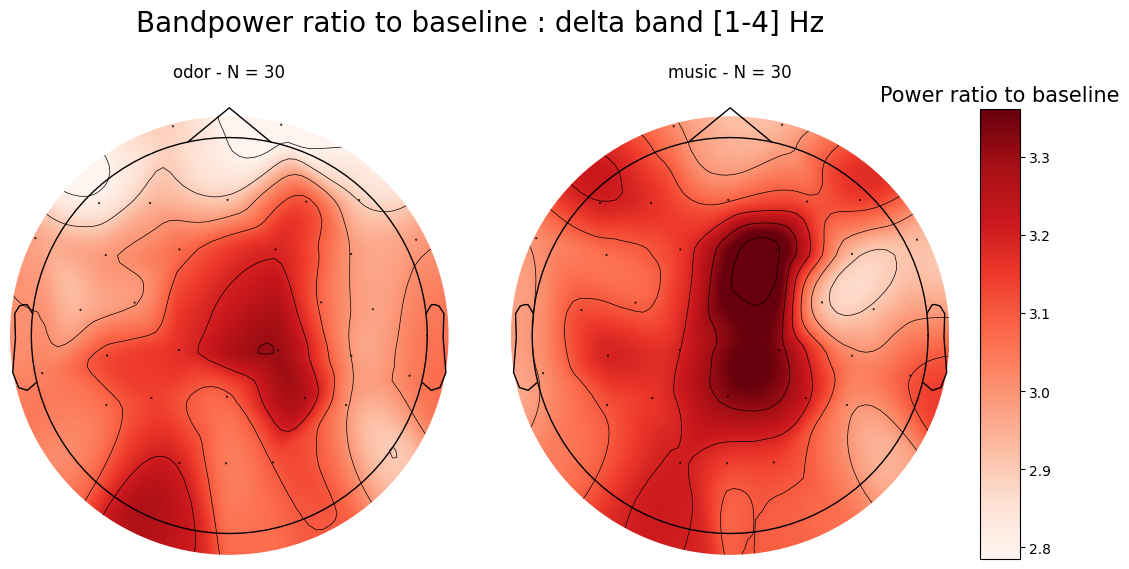

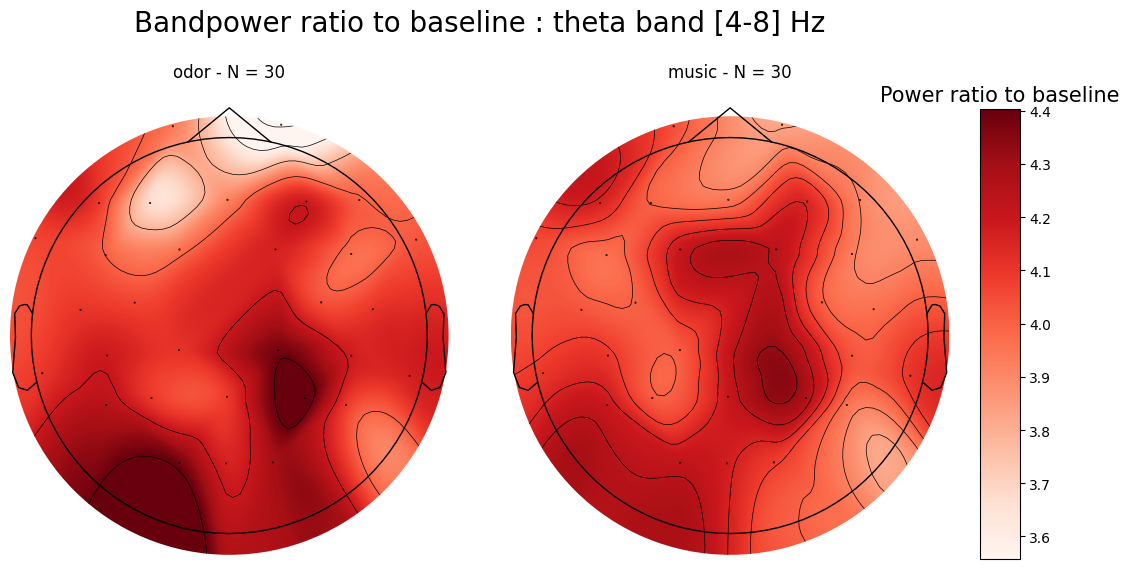

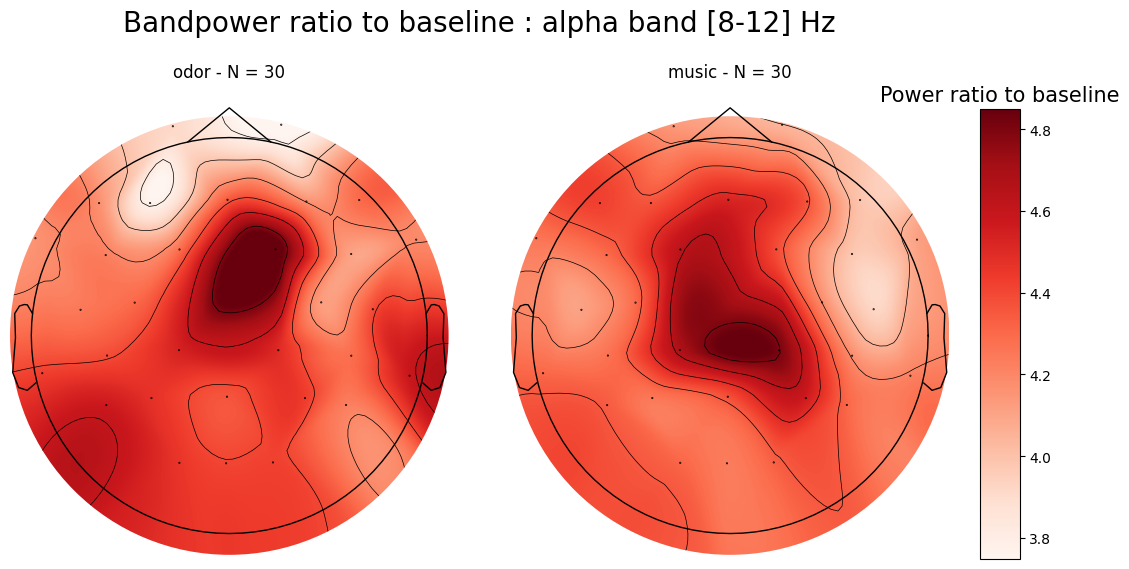

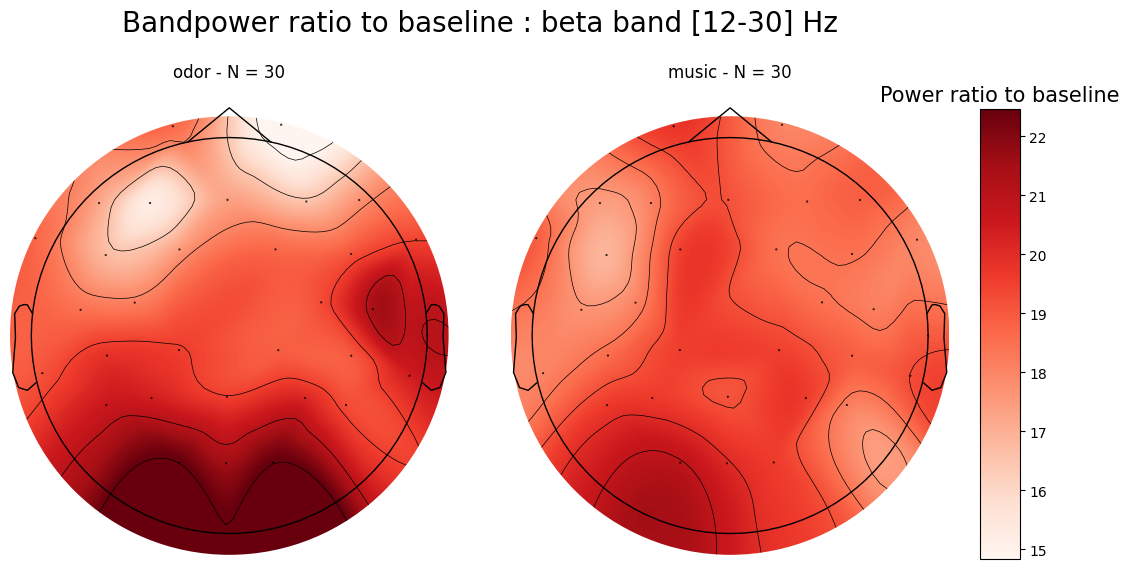

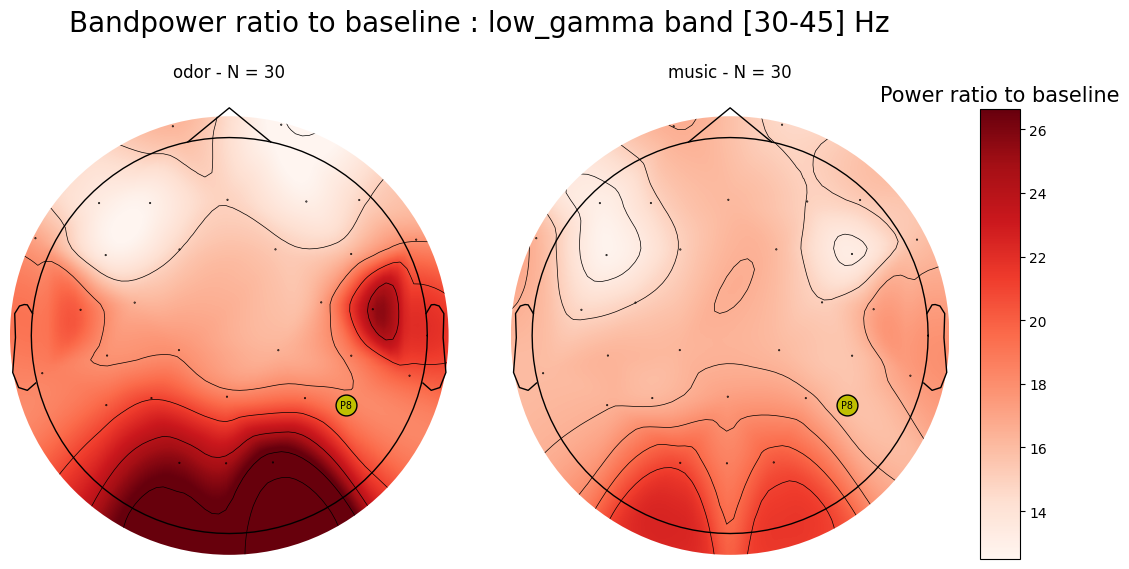

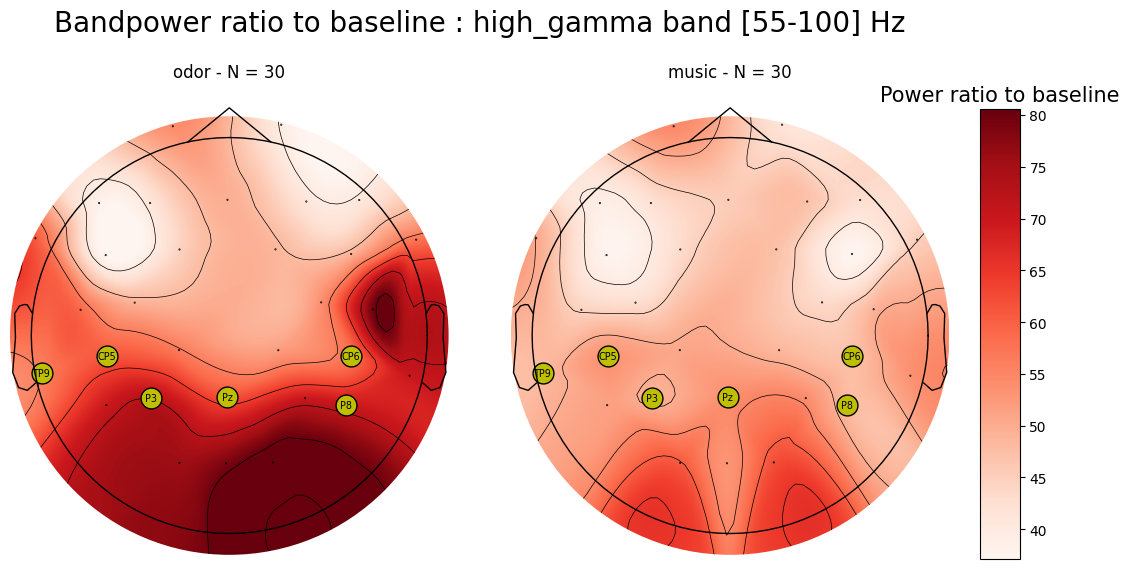

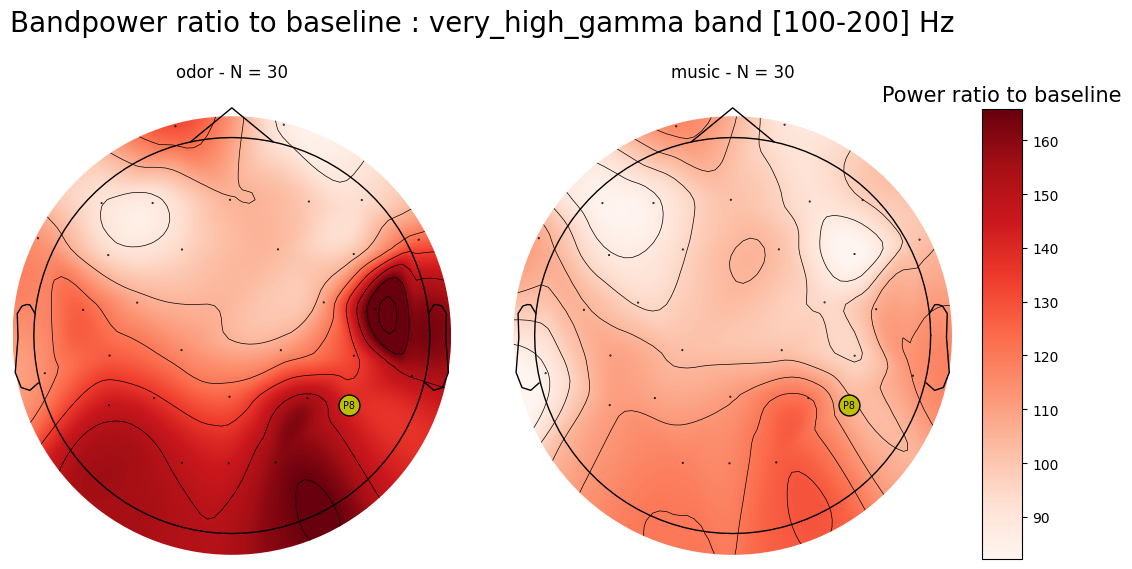

In [29]:
metric = 'power_integral'

N = len(subject_keys)

for band in fbands.keys():
    bandpower_of_band_sub = bandpower[bandpower['band'] == band]
    df_mask = get_df_mask_chan_signif(df = bandpower_of_band_sub, chans = eeg_chans, predictor = 'session', outcome = metric, subject = 'participant')
    
    bandpower_of_band = bandpower_mean[bandpower_mean['band'] == band]
    
    lc = fbands[band][0]
    hc = fbands[band][1]
    
    delta = 0.01
    mini = bandpower_of_band[metric].quantile(delta)
    maxi = bandpower_of_band[metric].quantile(1 - delta)
    
    vlim = (mini,maxi)

    fig, axs = plt.subplots(ncols = bandpower_of_band['session'].unique().size,figsize = (10,5), constrained_layout = True)
    fig.suptitle(f'Bandpower ratio to baseline : {band} band [{lc}-{hc}] Hz', fontsize = 20, y = 1.1)
    for c, session in enumerate(['odor','music']):
        ax = axs[c]
        mask = bandpower_of_band[bandpower_of_band['session'] == session]
        data_ready = mask.groupby('chan').mean(numeric_only = True)[metric].reindex(eeg_chans)
        data = data_ready.values
        im, _ = mne.viz.plot_topomap(data=data,pos = pos, names = eeg_chans, axes=ax, show = False, vlim=vlim, cmap = 'Reds', mask = df_mask['mask_corr'], mask_params = mask_params)
        
        ax.set_title(f'{session} - N = {N}')
        
    ax_x_start = 1
    ax_x_width = 0.04
    ax_y_start = 0
    ax_y_height = 0.9
    cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
    clb = fig.colorbar(im, cax=cbar_ax)
    clb.ax.set_title('Power ratio to baseline',fontsize=15)
    
    file = base_folder / 'Figures' / 'bandpower' / 'global' / f'{band}.png'
    

    fig.savefig(file, bbox_inches = 'tight')


In [13]:
oas = oas_concat_job.get(global_key).to_dataframe().set_index('participant')
bmrq = bmrq_concat_job.get(global_key).to_dataframe().set_index('participant')

In [14]:
N = len(subject_keys)

for subject in subject_keys:
    bandpower_subject = bandpower[bandpower['participant'] == subject]
    bmrq_sub = bmrq.loc[subject, 'BMRQ'].round(3)
    oas_sub = oas.loc[subject, 'OAS'].round(3)
    for band in fbands.keys():
        bandpower_of_band = bandpower_subject[bandpower_subject['band'] == band]

        lc = fbands[band][0]
        hc = fbands[band][1]

        delta = 0.05
        mini = bandpower_of_band['power_integral'].quantile(delta)
        maxi = bandpower_of_band['power_integral'].quantile(1 - delta)
        vlim = (mini,maxi)

        fig, axs = plt.subplots(ncols = bandpower_of_band['session'].unique().size,figsize = (10,5), constrained_layout = True)
        fig.suptitle(f'{subject} - Bandpower ratio to baseline : {band} band [{lc}-{hc}] Hz \n OAS : {oas_sub} - BMRQ : {bmrq_sub}', fontsize = 20, y = 1.1)
        for c, session in enumerate(['odor','music']):
            ax = axs[c]
            mask = bandpower_of_band[bandpower_of_band['session'] == session]
            data_ready = mask.groupby('chan').mean(numeric_only = True)['power_integral'].reindex(eeg_chans)
            data = data_ready.values
            im, _ = mne.viz.plot_topomap(data=data,pos = pos, names = eeg_chans, axes=ax, show = False, vlim=vlim, cmap = 'Reds')

            ax.set_title(f'{session}')

        ax_x_start = 1
        ax_x_width = 0.04
        ax_y_start = 0
        ax_y_height = 0.9
        cbar_ax = fig.add_axes([ax_x_start, ax_y_start, ax_x_width, ax_y_height])
        clb = fig.colorbar(im, cax=cbar_ax)
        clb.ax.set_title('Power ratio to baseline',fontsize=15)
        
        save_folder = base_folder / 'Figures' / 'bandpower' / 'by_subject' / f'{band}'
        if not os.path.isdir(save_folder):
            os.mkdir(save_folder)
            
        file = save_folder / f'{subject}.png'
        fig.savefig(file, bbox_inches = 'tight')
        plt.close()

# PSDs

In [15]:
psds = None

for sub in subject_keys:
    for ses in ['odor','music']:
        key = f'{sub}_{ses}'
        psd = psd_baselined_job.get(key)['psd_baselined']
        
        if psds is None:
            psds = gh.init_da({'participant':subject_keys, 'session':['odor','music'], 'chan':psd['chan'].values, 'freq':psd['freq'].values})
        psds.loc[sub, ses, : ,:] = psd

In [19]:
for chan in eeg_chans:
    psds_chan = psds.sel(chan = chan, freq = slice(1,30))
    f = psds_chan['freq'].values
    sds = psds_chan.std(dim = 'participant')
    ms = psds_chan.mean(dim = 'participant')

    fig, ax = plt.subplots(figsize = (15,5))

    for ses in ['odor','music']:
        m =  ms.sel(session = ses).values
        sd =  sds.sel(session = ses).values
        ax.plot(f, m, lw = 1, label = ses)
        ax.fill_between(f, m-sd , m + sd, alpha = 0.2)
    ax.set_xlabel('Freq [Hz]')
    ax.set_ylabel('Power ratio to baseline')
    ax.set_title(f'Power ratio to baseline in electrode {chan}', fontsize = 20)
    ax.legend()
    
    fig.savefig(base_folder / 'Figures' / 'bandpower' / 'psds' / f'{chan}.png', bbox_inches = 'tight')
    plt.close()

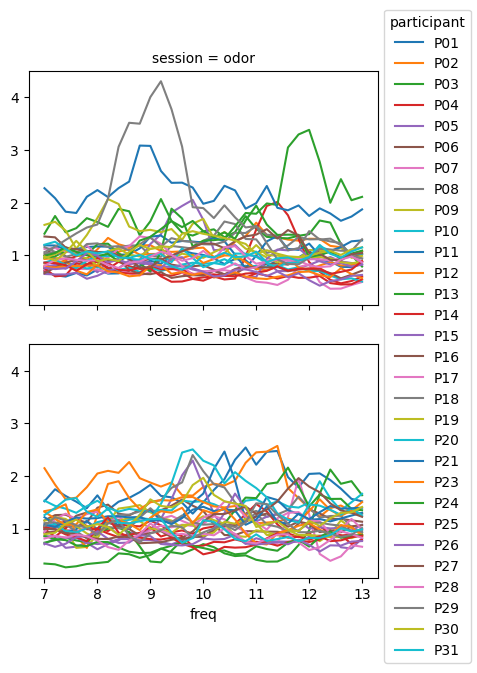

In [17]:
psds.sel(chan = 'F3', freq = slice(7,13)).plot.line(x = 'freq', hue = 'participant', row = 'session')